In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import gmaps
from scipy.stats import linregress
from Config import google_key

#Pull in csv from total yearly rent vs. income
path = ("../output_data/spending_on_rent.csv")
spending = pd.read_csv(path)

path_2 = ("../output_data/all_data_lat-lng.csv")
merged = pd.read_csv(path_2)

In [11]:
#Take out % so can do analysis and merge with whole dataframe
all = pd.merge(merged, spending, on="State")
all["'15 % of Income on Rent"] = all["'15 % of Income on Rent"].str.replace(r"%", r"").astype("float")
all["'16 % of Income on Rent"] = all["'16 % of Income on Rent"].str.replace(r"%", r"").astype("float")
all["'17 % of Income on Rent"] = all["'17 % of Income on Rent"].str.replace(r"%", r"").astype("float")
all

,State,2015 Yearly Rent,2016 Yearly Rent,2017 Yearly Rent,'15-'16 Rent Diff.,'16-'17 Rent Diff.,2015 Income,2016 Income,2017 Income,'15-'16 Income Diff.,'16-'17 Income Diff.,Lat,Lng,'15 % of Income on Rent,'16 % of Income on Rent,'17 % of Income on Rent
0,Alabama,11400.0,11700.0,11970.0,300.0,270.0,46053,48237,51113,2184,2876,32.318231,-86.902298,24.75,24.26,23.42
1,Alaska,20190.0,19800.0,19170.0,-390.0,-630.0,77717,77351,72231,-366,-5120,64.200841,-149.493673,25.98,25.60,26.54
2,Arizona,14700.0,15000.0,16200.0,300.0,1200.0,54060,58328,61125,4268,2797,34.048928,-111.093731,27.19,25.72,26.50
3,Arkansas,12000.0,12000.0,12600.0,0.0,600.0,44282,46894,48829,2612,1935,35.201050,-91.831833,27.10,25.59,25.80
4,California,27510.0,28740.0,31500.0,1230.0,2760.0,65843,68070,69759,2227,1689,36.778261,-119.417932,41.78,42.22,45.16
5,Colorado,19500.0,20400.0,21600.0,900.0,1200.0,68906,72084,74172,3178,2088,39.550051,-105.782067,28.30,28.30,29.12
6,Connecticut,21000.0,20400.0,21000.0,-600.0,600.0,75417,77556,72780,2139,-4776,41.603221,-73.087749,27.85,26.30,28.85
7,Delaware,15600.0,15600.0,15600.0,0.0,0.0,59759,59294,62318,-465,3024,38.910832,-75.527670,26.10,26.31,25.03
8,District of Columbia,30000.0,30300.0,31200.0,300.0,900.0,72501,72508,83382,7,10874,38.907192,-77.036871,41.38,41.79,37.42
9,Florida,19800.0,20280.0,20700.0,480.0,420.0,50518,52277,53681,1759,1404,27.664827,-81.515754,39.19,38.79,38.56


In [15]:
#See if theres a pattern on highest spending states on rent 2015
gmaps.configure(api_key=google_key)

locations = all[["Lat", "Lng"]]
spending_2015 = all["'15 % of Income on Rent"]
fig = gmaps.figure()

heatmap_layer = gmaps.heatmap_layer(locations, weights=spending_2015, dissipating=False,
                                          max_intensity=(max(spending_2015)),
                                          point_radius=3)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

The r-squared: 0.08883508936932207


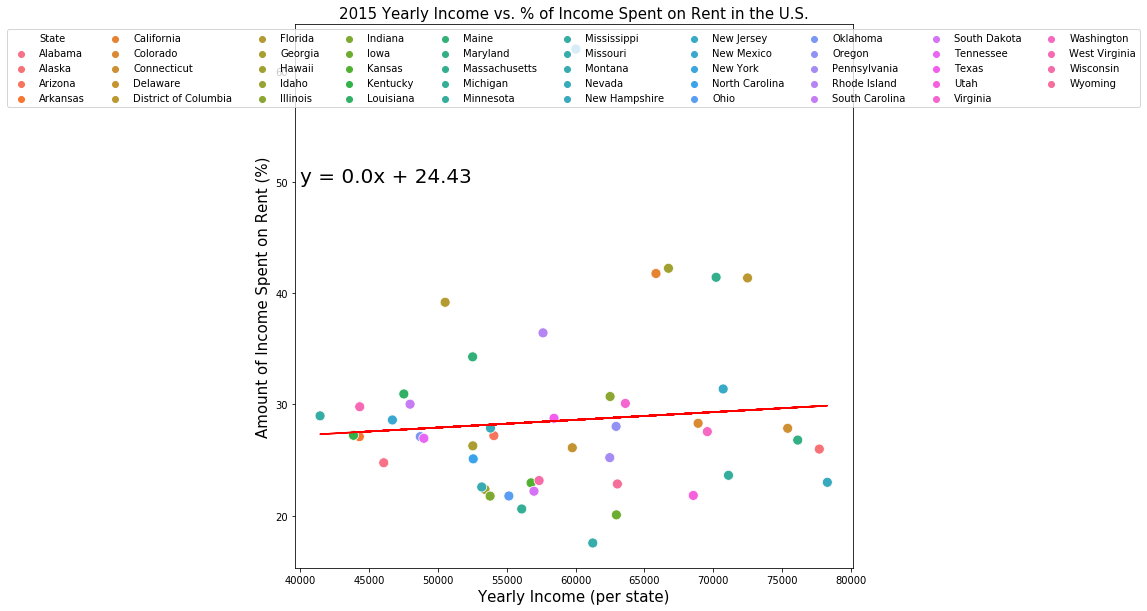

In [19]:
#Does spending correlate more to higher income, or higher rent?
#2015 spending vs. income
x_values = all["2015 Income"].astype('float')
y_values = all["'15 % of Income on Rent"].astype('float')
states = all["State"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_values, y=y_values, hue=states, markers="o", s=100)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(40000,50),fontsize=20,color="black")
plt.xlabel('Yearly Income (per state)', fontsize=15)
plt.ylabel('Amount of Income Spent on Rent (%)', fontsize=15)
plt.title("2015 Yearly Income vs. % of Income Spent on Rent in the U.S.", fontsize=15)
plt.legend(loc='upper center', ncol=10)
print(f"The r-squared: {rvalue}")

plt.savefig("../output_data/2015_income_vs_spending.png")
plt.show()